<a href="https://colab.research.google.com/github/anruki/ImgProcessing/blob/main/Coins_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clase Procesamiento de imágenes 31/10/2024
## OPEN CV

In [ ]:
!pip install opencv-python



---



In [ ]:
import cv2

Han desactivado el `imshow()`

In [ ]:
# cv.imshow()

Por lo que debemos instalar:

In [ ]:
# Especifico de Colab
!pip install opencv-python
!pip install opencv_jupyter_ui
!pip install -q ipycanvas==0.11
from google.colab import output
output.enable_custom_widget_manager()

Para poder usar `imshow()`

In [ ]:
import cv2
from matplotlib import pyplot as plt
import opencv_jupyter_ui as jcv2


Ahora hay que ver que imágen usamos

In [ ]:
# jcv2.imshow()

En google images buscamos una imágen

In [ ]:
coins = cv2.imread("coins.jpg")
jcv2.imshow("",coins)
# plt.imshow(mario)
# plt.show()

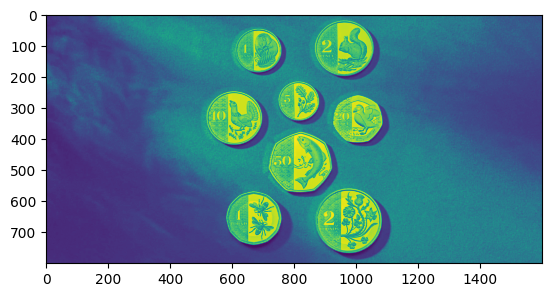

In [ ]:
coinsgray = cv2.cvtColor(coins,cv2.COLOR_BGR2GRAY)
plt.imshow(coinsgray)
plt.show()

Sale así porque está en BGR y no RGB

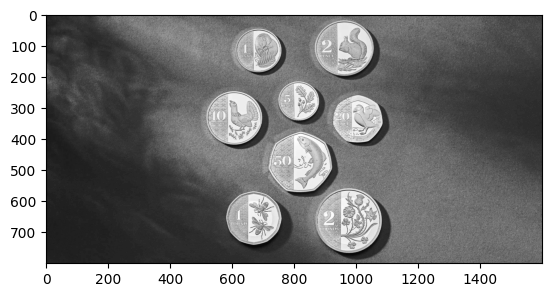

In [ ]:
plt.imshow(coinsgray,cmap="gray")
plt.show()

Binarización

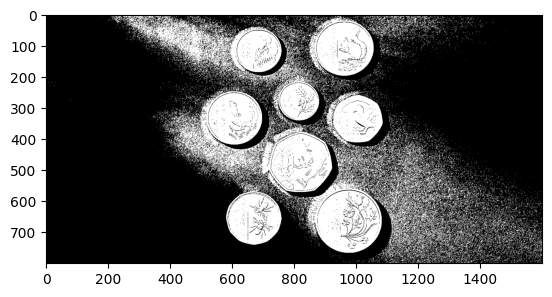

In [ ]:
_,coinsbin = cv2.threshold(coinsgray,120,255,cv2.THRESH_BINARY)
plt.imshow(coinsbin,cmap="gray")
plt.show()

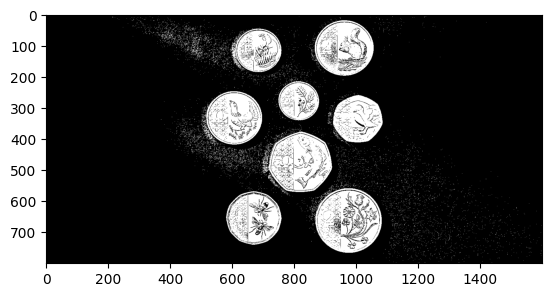

In [ ]:
_,coinsbin = cv2.threshold(coinsgray,150,125,cv2.THRESH_BINARY)
plt.imshow(coinsbin,cmap="gray")
plt.show()

In [ ]:
coinsbin_display = cv2.cvtColor(coinsbin, cv2.COLOR_GRAY2BGR)
jcv2.imshow("coins",coinsbin_display)

Si quiero aplicar un blur:

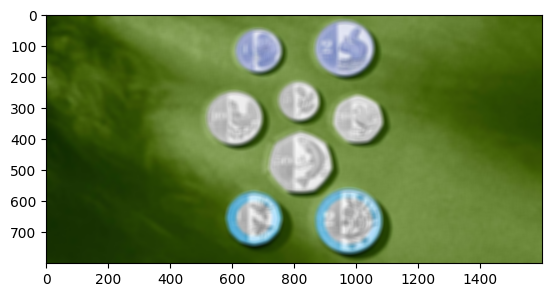

In [ ]:
coinsblur = cv2.blur(coins,[16,16])
# Defino la matriz del pinceel brush a mano
# tamaño [16,16]
plt.imshow(coinsblur,cmap="gray")
plt.show()

Otro tipo de blur (hay varios tipos):

[Documentación tipos de blur](https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html)

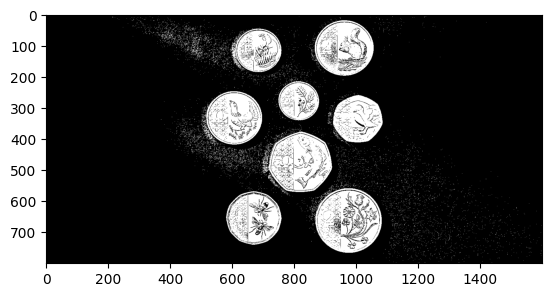

In [ ]:
plt.imshow(coinsbin,cmap="gray")
plt.show()

### **Dilate**

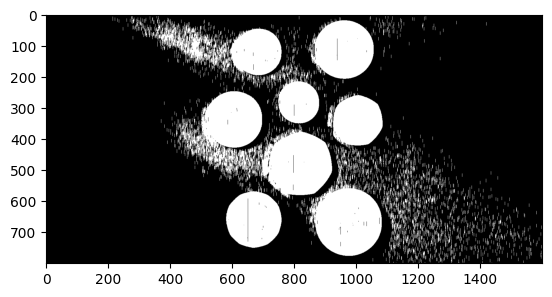

In [ ]:
coinsdilate = cv2.dilate(coinsbin,(16,16),iterations=10)
plt.imshow(coinsdilate,cmap="gray")
plt.show()

##**Erode**

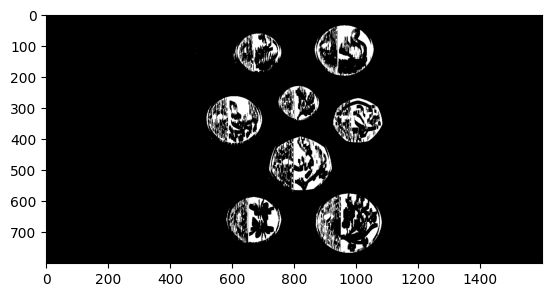

In [ ]:
coinserode = cv2.erode(coinsbin,(16,16),iterations=10)
plt.imshow(coinserode,cmap="gray")
plt.show()

## **OPEN & CLOSE**

In [ ]:
coinsopen = cv2.dilate(coinserode,(16,16),iterations=20)

coinsclose = cv2.erode(coinsdilate,(16,16),iterations=20)

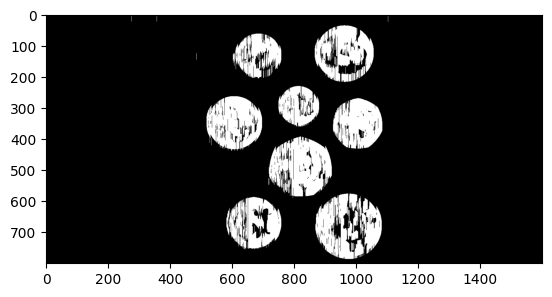

In [ ]:
plt.imshow(coinsopen,cmap="gray")
plt.show()

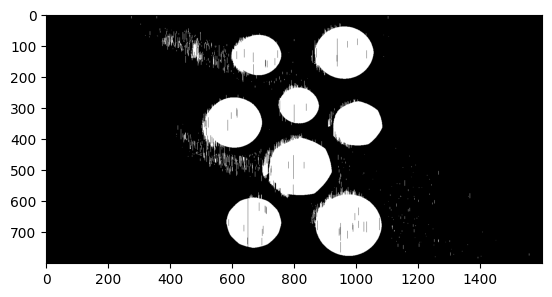

In [ ]:
plt.imshow(coinsclose,cmap="gray")
plt.show()

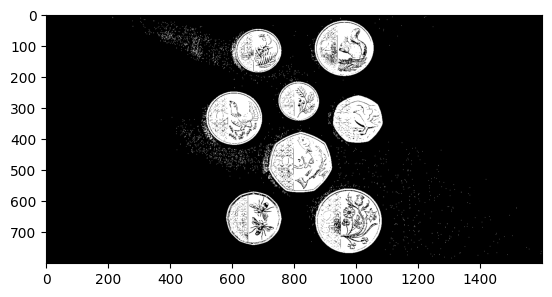

In [ ]:
coinsOpen2 = cv2.morphologyEx(coinsbin,cv2.MORPH_OPEN,(8,8))
plt.imshow(coinsOpen2,cmap="gray")
plt.show()

Con  un brush

In [ ]:
brush = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,[15,15]) # uso MORPH_ELIPSE porque las monedas son redondas

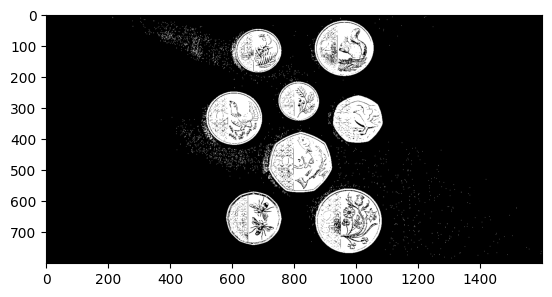

In [ ]:
coinsClose2 = cv2.morphologyEx(coinsbin,cv2.MORPH_OPEN,brush)
plt.imshow(coinsOpen2,cmap="gray")
plt.show()

## **Clusterización**

In [ ]:
countours, hierarchy = cv2.findContours(coinsOpen2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

coinsclose_display = cv2.cvtColor(coinsclose, cv2.COLOR_GRAY2BGR)
jcv2.imshow("coins",coinsclose_display)

In [ ]:
clusters, hierarchy = cv2.findContours(coinsClose2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

coinsclose2_display = cv2.cvtColor(coinsClose2, cv2.COLOR_GRAY2BGR)
jcv2.imshow("coins",coinsclose2_display)

In [ ]:
AreaMin = 12000
countCoins = 0
for cluster in clusters:
  Area = cv2.contourArea(cluster)
  if(Area > AreaMin):
    cv2.drawContours(coinsclose2_display, [cluster],-1, (0,255,0),5)
    countCoins = countCoins+1
  print("area = ",Area)

print("coins number = ",countCoins)
jcv2.imshow("title", coinsClose2,countCoins)